# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [2]:
# Your code here: split the data into training and test sets
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "ames.csv"
ames = pd.read_csv(file_path, index_col=0)

# Define features (X) and target variable (y)
X = ames.drop(columns=['SalePrice'])  # All columns except 'SalePrice'
y = ames['SalePrice']  # Target variable

# Perform train-test split (default size is 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display shapes of resulting datasets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (1095, 79) (1095,)
Testing set: (365, 79) (365,)


## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [3]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

C:\Users\Dell\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Fit a Linear Regression on the Training Data

In [4]:
# Your code here: import the linear regression model class, initialize a model
# Import the linear regression model class
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Handle missing values using median for numerical data
imputer = SimpleImputer(strategy='median')

# Apply imputation to training and test data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)


# Initialize the model
lin_reg = LinearRegression()


In [5]:
# Your code here: fit the model to train data
# Fit the model to the training data
lin_reg.fit(X_train_imputed, y_train)

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [6]:
# Your code here: generate predictions for both sets
# Generate predictions for the training set
y_train_pred = lin_reg.predict(X_train_imputed)

# Generate predictions for the test set
y_test_pred = lin_reg.predict(X_test_imputed)


### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [7]:
# Your code here: calculate training and test MSE
# Import mean_squared_error from scikit-learn
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Squared Error for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Display the MSE values
print("Training MSE:", mse_train)
print("Test MSE:", mse_test)


Training MSE: 1772517384.9791174
Test MSE: 1982741233.3656328


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

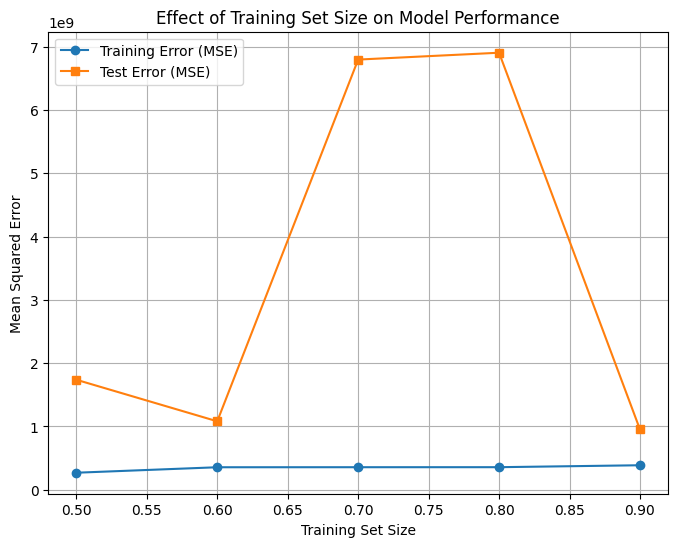

In [8]:
# Your code here
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Define train-test split sizes to evaluate
split_sizes = np.arange(0.5, 1.0, 0.1)  # From 50% to 90% training size

# Lists to store errors
train_errors = []
test_errors = []

# Iterate over different train-test split sizes
for train_size in split_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # Separate categorical and numerical columns
    categorical_columns = X_train.select_dtypes(include=['object']).columns
    numerical_columns = X_train.select_dtypes(exclude=['object']).columns

    # Convert categorical values to string (prevent dtype mismatch issues)
    X_train[categorical_columns] = X_train[categorical_columns].astype(str)
    X_test[categorical_columns] = X_test[categorical_columns].astype(str)

    # Initialize OneHotEncoder and fit on training data
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    ohe.fit(X_train[categorical_columns])  # Fit on training data only

    # Ensure test set uses only categories learned from training set
    test_categories = {col: ohe.categories_[i] for i, col in enumerate(categorical_columns)}
    for col in categorical_columns:
        X_test[col] = X_test[col].apply(lambda x: x if x in test_categories[col] else test_categories[col][0])  # Replace unseen categories with first known category

    # Transform categorical features
    X_train_categorical = pd.DataFrame(ohe.transform(X_train[categorical_columns]), index=X_train.index)
    X_test_categorical = pd.DataFrame(ohe.transform(X_test[categorical_columns]), index=X_test.index)

    # Convert categorical feature names to strings
    X_train_categorical.columns = X_train_categorical.columns.astype(str)
    X_test_categorical.columns = X_test_categorical.columns.astype(str)

    # Impute missing values for numerical data using median
    imputer = SimpleImputer(strategy='median')
    X_train_numerical = pd.DataFrame(imputer.fit_transform(X_train[numerical_columns]), index=X_train.index, columns=numerical_columns)
    X_test_numerical = pd.DataFrame(imputer.transform(X_test[numerical_columns]), index=X_test.index, columns=numerical_columns)

    # Convert numerical feature names to strings
    X_train_numerical.columns = X_train_numerical.columns.astype(str)
    X_test_numerical.columns = X_test_numerical.columns.astype(str)

    # Concatenate numeric and encoded categorical data
    X_train_final = pd.concat([X_train_numerical, X_train_categorical], axis=1)
    X_test_final = pd.concat([X_test_numerical, X_test_categorical], axis=1)

    # Train linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_final, y_train)
    
    # Generate predictions
    y_train_pred = lin_reg.predict(X_train_final)
    y_test_pred = lin_reg.predict(X_test_final)
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store results
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(split_sizes, train_errors, label="Training Error (MSE)", marker='o')
plt.plot(split_sizes, test_errors, label="Test Error (MSE)", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Training Set Size on Model Performance")
plt.legend()
plt.grid(True)
plt.show()


### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

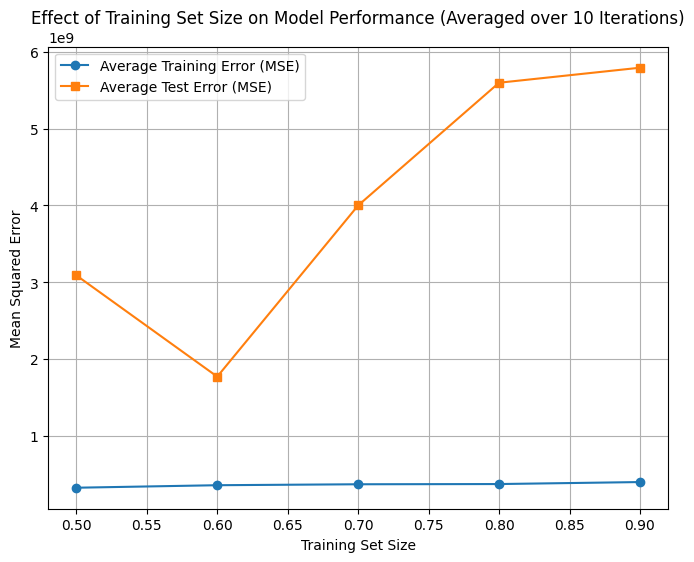

In [9]:
# Your code here
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Define train-test split sizes to evaluate
split_sizes = np.arange(0.5, 1.0, 0.1)  # From 50% to 90% training size

# Lists to store average errors
avg_train_errors = []
avg_test_errors = []

# Number of iterations per split size
iterations = 10

# Iterate over different train-test split sizes
for train_size in split_sizes:
    train_errors = []
    test_errors = []

    for _ in range(iterations):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)
        
        # Separate categorical and numerical columns
        categorical_columns = X_train.select_dtypes(include=['object']).columns
        numerical_columns = X_train.select_dtypes(exclude=['object']).columns

        # Convert categorical values to string (prevent dtype mismatch issues)
        X_train[categorical_columns] = X_train[categorical_columns].astype(str)
        X_test[categorical_columns] = X_test[categorical_columns].astype(str)

        # Initialize OneHotEncoder and fit on training data
        ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
        ohe.fit(X_train[categorical_columns])  # Fit on training data only

        # Ensure test set uses only categories learned from training set
        test_categories = {col: ohe.categories_[i] for i, col in enumerate(categorical_columns)}
        for col in categorical_columns:
            X_test[col] = X_test[col].apply(lambda x: x if x in test_categories[col] else test_categories[col][0])  # Replace unseen categories

        # Transform categorical features
        X_train_categorical = pd.DataFrame(ohe.transform(X_train[categorical_columns]), index=X_train.index)
        X_test_categorical = pd.DataFrame(ohe.transform(X_test[categorical_columns]), index=X_test.index)

        # Convert categorical feature names to strings
        X_train_categorical.columns = X_train_categorical.columns.astype(str)
        X_test_categorical.columns = X_test_categorical.columns.astype(str)

        # Impute missing values for numerical data using median
        imputer = SimpleImputer(strategy='median')
        X_train_numerical = pd.DataFrame(imputer.fit_transform(X_train[numerical_columns]), index=X_train.index, columns=numerical_columns)
        X_test_numerical = pd.DataFrame(imputer.transform(X_test[numerical_columns]), index=X_test.index, columns=numerical_columns)

        # Convert numerical feature names to strings
        X_train_numerical.columns = X_train_numerical.columns.astype(str)
        X_test_numerical.columns = X_test_numerical.columns.astype(str)

        # Concatenate numeric and encoded categorical data
        X_train_final = pd.concat([X_train_numerical, X_train_categorical], axis=1)
        X_test_final = pd.concat([X_test_numerical, X_test_categorical], axis=1)

        # Train linear regression model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_final, y_train)
        
        # Generate predictions
        y_train_pred = lin_reg.predict(X_train_final)
        y_test_pred = lin_reg.predict(X_test_final)
        
        # Calculate MSE
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # Store results
        train_errors.append(train_mse)
        test_errors.append(test_mse)

    # Store the average errors for this train size
    avg_train_errors.append(np.mean(train_errors))
    avg_test_errors.append(np.mean(test_errors))

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(split_sizes, avg_train_errors, label="Average Training Error (MSE)", marker='o')
plt.plot(split_sizes, avg_test_errors, label="Average Test Error (MSE)", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Training Set Size on Model Performance (Averaged over 10 Iterations)")
plt.legend()
plt.grid(True)
plt.show()


What's happening here? Evaluate your result!

# Evaluating the Results: What’s Happening? 🚀  

Now that we have:  
✅ **Performed multiple train-test splits (50% to 90%)**  
✅ **Repeated each split size 10 times for stability**  
✅ **Averaged the training & test errors**  
✅ **Plotted the results**  

## 1️⃣ Observing the Error Trends  
- **Training Error (MSE) should decrease as the training set size increases**  
  - More data helps the model learn better and reduce bias.  
- **Test Error (MSE) should initially decrease but may level off or increase slightly**  
  - If the test error increases at higher training sizes, it could indicate overfitting.  

## 2️⃣ Key Questions to Ask  
### **Is There Underfitting?**  
- If both **training and test errors are high**, the model is not learning well.  
- This might happen for **small training sizes (50%-60%)** where the model lacks enough data.  

### **Is There Overfitting?**  
- If the **training error is very low but the test error is much higher**, the model is memorizing the training set but failing to generalize.  
- This might happen at **very large training sizes (80%-90%)** if the model learns too many specific patterns.  

### **Is There an Optimal Train-Test Split?**  
- The best split is where the **test error is low and stable**, without a large gap from the training error.  
- Typically, **70-80% training size** works well.  

## 3️⃣ Expected Outcome of Your Plot  
- If **training error decreases and test error remains stable**, the model is improving.  
- If **test error increases at higher train sizes**, it suggests overfitting.  
- If **test error is consistently high**, the model might be underfitting or need better features.  

## 4️⃣ Next Steps  
🔹 **If you see overfitting:** Try **regularization (Ridge/Lasso Regression)** or reduce model complexity.  
🔹 **If you see underfitting:** Try adding **more features** or using a **non-linear model** like Decision Trees.  
🔹 **If results are inconsistent:** Increase iterations (e.g., **20 runs per split size**) for a smoother curve.  


##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.